# Problem Statement


---


ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.


Objective
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

# **Importing Libraries**


---


These libraries are commonly used libraries and we will use all these for creating model, visualizing etc.




In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Reading Train Data using pd.read_csv and printing the data to see the dataset's content

In [10]:
df = pd.read_csv('/content/train_0OECtn8.csv') #pd.read_csv() to read the data
df.head(15)

row_id  user_id  category_id  ...  followers  views engagement_score
0        1    19990           37  ...        180   1000             4.33
1        2     5304           32  ...        330    714             1.79
2        3     1840           12  ...        180    138             4.35
3        4    12597           23  ...        220    613             3.77
4        5    13626           23  ...        220    613             3.13
5        6     9323           25  ...        240    317             3.33
6        7     2071            7  ...        160    467             3.80
7        8    21848            8  ...        280    628             3.87
8        9    12896            3  ...        270    621             2.88
9       10    16058            5  ...        240    229             3.80
10      11    15545           12  ...        180    138             3.73
11      12    23887           28  ...        250    414             3.13
12      13     7626            5  ...        240    229             0.00
13      14    17094           20  ...        240    892             3.61
14      15    13839           36  ...        260    178             4.20

[15 rows x 10 columns]

We wil check if there are null values present in the dataset using isnull().sum() operation

In [11]:
df.isnull().sum() #isnull().sum() to check null values

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [12]:
df.describe() #describing the dataset to understand the data, this is an important step while understanding the data

row_id       user_id  ...         views  engagement_score
count  89197.000000  89197.000000  ...  89197.000000      89197.000000
mean   44599.000000  13881.909806  ...    502.980268          3.487797
std    25749.100318   8005.582771  ...    268.569482          0.863498
min        1.000000      1.000000  ...     30.000000          0.000000
25%    22300.000000   6945.000000  ...    229.000000          2.900000
50%    44599.000000  13892.000000  ...    467.000000          3.710000
75%    66898.000000  20819.000000  ...    714.000000          4.150000
max    89197.000000  27734.000000  ...   1000.000000          5.000000

[8 rows x 8 columns]

In [13]:
df.describe(include = [object]) #using describe(include = [object]) to understand the categorical data

gender profession
count   89197      89197
unique      2          3
top      Male    Student
freq    52397      44638

## Data Preprocessing

Converting categorical data into numerical data using encoders. I tried using label encoder as well as one hot encoding, but in the end used label encoder

In [7]:
for x in ['followers','age']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [8]:
df.isnull().sum()

row_id                 0
user_id                0
category_id            0
video_id               0
age                  211
gender                 0
profession             0
followers           1810
views                  0
engagement_score       0
dtype: int64

In [ ]:
df = df.dropna(axis = 0)

# Visualization

Plotting different variables w.r.t engagement score to find out the features

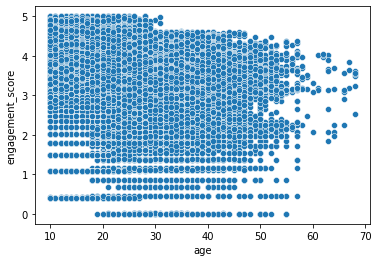

In [14]:
sns.scatterplot(x=df['age'], y = df['engagement_score'])

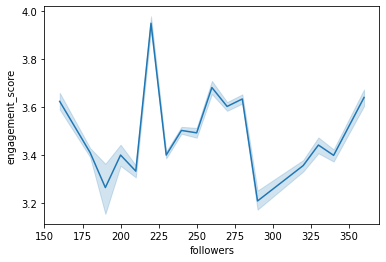

In [15]:
sns.lineplot(x=df['followers'], y = df['engagement_score'])

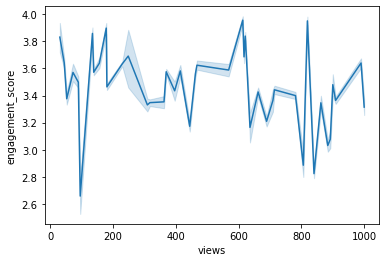

In [16]:
sns.lineplot(x=df['views'], y = df['engagement_score'])

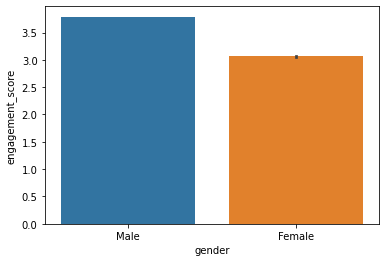

In [17]:
sns.barplot(x=df['gender'], y = df['engagement_score'])

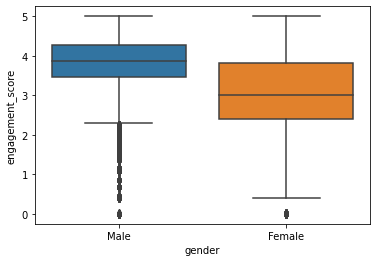

In [18]:
sns.boxplot(x=df['gender'], y = df['engagement_score'])

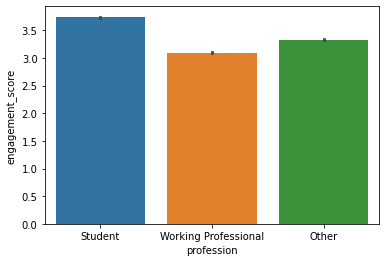

In [19]:
sns.barplot(x=df['profession'], y = df['engagement_score'])

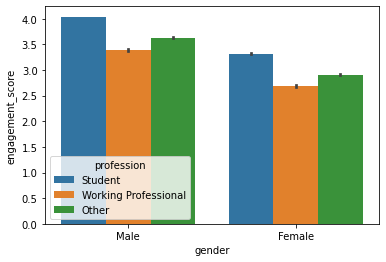

In [20]:
sns.barplot(x=df['gender'], y = df['engagement_score'], hue = df['profession'])

## Pandas Profile Report

It is a really useful tool which helps us visualize, find correlation between columns and many different visualizations are created which helps in feature selection.

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
report = df.profile_report(html={'style':{'full_width':True}})  #used to create the pandas profile report 

report.to_notebook_iframe() #We display the report as an iframe inside the notebook using this function

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
df = pd.get_dummies(df, columns=['gender', 'profession'])

In [22]:
df.head() #Checking if enconding is properly done

row_id  user_id  ...  profession_Student  profession_Working Professional
0       1    19990  ...                   1                                0
1       2     5304  ...                   1                                0
2       3     1840  ...                   1                                0
3       4    12597  ...                   1                                0
4       5    13626  ...                   0                                1

[5 rows x 13 columns]

# Feature Selection

In [ ]:
from sklearn.decomposition import PCA
model=PCA(n_components=7).fit(X)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
X.columns[most_important]

Index(['user_id', 'views', 'followers', 'age', 'gender_Female',
       'profession_Other', 'profession_Student'],
      dtype='object')

Selecting features and dividing it into X and y dataframes, X contains the selected features and y contains the target variable

In [23]:
X = df[['user_id','age', 'gender_Female','gender_Male','profession_Other','profession_Student', 'followers','views']] 
y = df['engagement_score']

In [24]:
X.head()

user_id  age  gender_Female  ...  profession_Student  followers  views
0    19990   24              0  ...                   1        180   1000
1     5304   14              1  ...                   1        330    714
2     1840   19              0  ...                   1        180    138
3    12597   19              0  ...                   1        220    613
4    13626   27              0  ...                   0        220    613

[5 rows x 8 columns]

Creating a function to train the model, using cv score and mean squared error as metrics. This function will help us to directly fit the model, predict the values and check the metrics

# Model Selection and Creation


---



Since it is a regression problem we can use different regression models available. Here we use different models and see how they perform. Here we have used Decision Tree Regressor, XGB Regressor, Gradient Boosting Regressor

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

These are the models that I tried and eventually I used random forest regressor.

In [26]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
model = DecisionTreeRegressor() 
  
# fit the regressor with X and Y data
train(model, X, y)

Model Report
MSE: 0.08815031289355772
CV Score: 0.5769158692297104


In [ ]:
from sklearn.ensemble import BaggingRegressor
b_regressor = BaggingRegressor(model, n_estimators = 100, max_features=3, max_samples=.5)

# fit the regressor with X and Y data
train(b_regressor, X, y)

Model Report
MSE: 0.31162217317917407
CV Score: 0.4609313367871167


In [ ]:
from xgboost.sklearn import XGBRegressor
model_xgb = XGBRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
train(model_xgb, X, y)

[17:00:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:00:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
MSE: 0.49356640487140335
CV Score: 0.4953327329329301


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
train(model_gbr, X, y)

Model Report
MSE: 0.49316590465941607
CV Score: 0.4953937361286321


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 700, random_state = 700)
 
train(regressor, X, y)

Model Report
MSE: 0.11218576729141458
CV Score: 0.41852667549151584


In [58]:
y_pred = regressor.predict(X) #Predicting the data and storing it in y_pred

Measuring R2 score, the score which is really important in perspective of this hackathon

In [59]:
r2 = r2_score(y, y_pred)
print('r2 score for model is', r2)

r2 score for model is 0.8495403962559909


Checking the importance of each feature

In [30]:
for importance, name in sorted(zip(model.feature_importances_, X.columns),reverse=True):
 print (name, importance)


user_id 0.41673388734546346
gender_Female 0.18943241750999462
age 0.15525628280771236
views 0.09611122821929459
profession_Student 0.09403240487419647
followers 0.03729669806336323
profession_Other 0.011137081179975214
gender_Male 0.0


## Importing Test Dataset

In [31]:
df_test = pd.read_csv('/content/test_1zqHu22.csv') #pd.read_csv() to read the data
df_test.head()

row_id  user_id  category_id  ...            profession  followers views
0   89198     7986           12  ...               Student        180   138
1   89199    11278           34  ...               Student        230   840
2   89200    17245            8  ...  Working Professional        280   628
3   89201     9851           16  ...               Student        270   462
4   89202    16008           34  ...                 Other        230   840

[5 rows x 9 columns]

Using label encoder to encode test dataset categorical variable

In [32]:
df_test = pd.get_dummies(df_test, columns=['gender', 'profession'])

In [33]:
X_test = df_test[['user_id','age', 'gender_Female','gender_Male','profession_Other','profession_Student', 'followers','views']] #test dataset features

In [60]:
y_pred_test = regressor.predict(X_test) #Prediction of target variable use the best model

In [61]:
df_test['engagement_score'] = y_pred_test #Adding the target variable column into the test dataframe

In [62]:
df_submit = df_test[['row_id','engagement_score']] #Creating a dataframe with 2 columns, row_id and engagement score
df_submit.head()

row_id  engagement_score
0   89198          4.151822
1   89199          3.915711
2   89200          2.402233
3   89201          2.954051
4   89202          1.983655

## Creating Result CSV file

In [63]:
pd.DataFrame(df_submit, columns=['row_id','engagement_score']).to_csv('/content/result.csv', index = False)

In [49]:
a = pd.read_csv('/content/result.csv') #Checking the content of result.csv file

In [39]:
a.head()

row_id  engagement_score
0   89198          4.149311
1   89199          3.913038
2   89200          2.424636
3   89201          2.914346
4   89202          1.923710